In [75]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

In [76]:
model = YOLO("chess_model.pt")

In [77]:
path = "rs/depth.raw"

width = 640
height = 360
bytes_per_pixel = 2

depth = np.fromfile(path, dtype=np.uint16)
depth = depth.reshape((height, width))

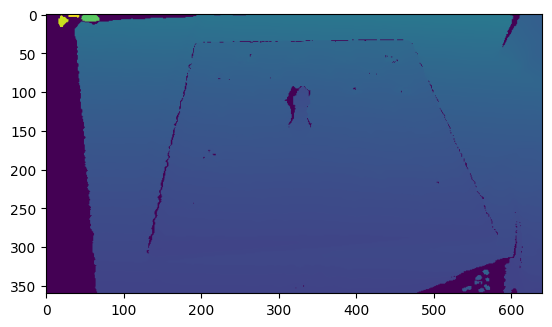

In [78]:
plt.imshow(depth)

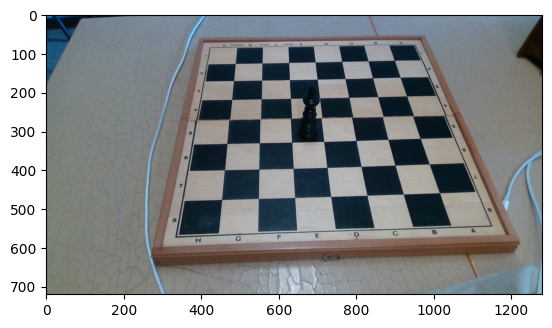

In [79]:
img = cv2.imread("rs/color.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [80]:
results = model(img)


0: 384x640 1 black-king, 46.7ms
Speed: 1.2ms preprocess, 46.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


In [81]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding boxes

    # Each box has: xyxy, xywh, conf, cls
    for box in boxes:
        # Get coordinates in [x1, y1, x2, y2] format
        x1, y1, x2, y2 = box.xyxy[0].tolist()

        # Get confidence
        confidence = box.conf[0].item()

        # Get class id
        class_id = int(box.cls[0].item())

        print(f"Class: {class_id}, Confidence: {confidence:.2f}, BBox: ({x1:.2f}, {y1:.2f}), ({x2:.2f}, {y2:.2f})")

Class: 1, Confidence: 0.89, BBox: (648.19, 176.91), (710.39, 329.26)


In [82]:
x1, y1, x2, y2 = result.boxes[0].xyxy[0]
midx = (x2-x1)/2 + x1
midy = (y2-y1)/2 + y1

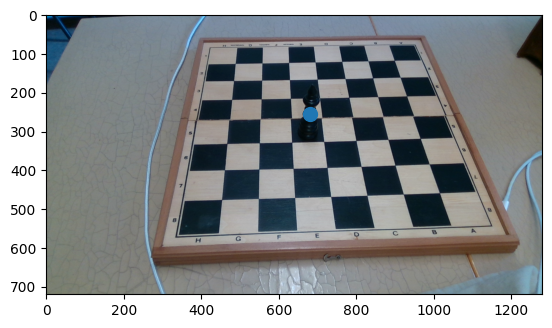

In [ ]:
img = cv2.imread("rs/color.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.plot(midx, midy, marker='o', markersize=10)

In [84]:
# Correction of wiggly hand
corr = -20
midx = midx + corr

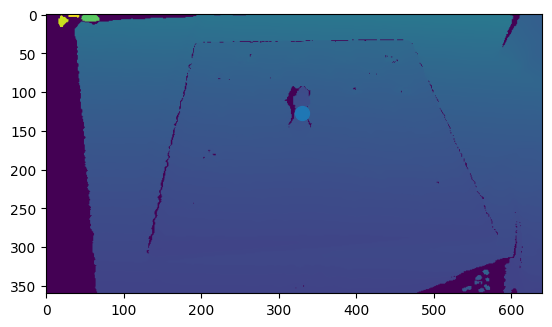

In [85]:
plt.imshow(depth)
plt.plot(midx / 2, midy / 2, marker='o', markersize=10)

In [86]:
piecex, piecey = int(np.round(midx / 2)), int(np.round(midy / 2))
depth[piecex][piecey]

np.uint16(410)

In [87]:
fx, fy = 444.168549, 444.168549
cx, cy = 323.591217, 178.795532

Z_d = depth[piecex][piecey]
Z = Z_d / 1000.0

X = (piecex - cx) * Z / fx
Y = (piecey - cy) * Z / fy

point_3d = np.array([X, Y, Z])
print("3D coordinates (meters):", point_3d)

3D coordinates (meters): [  0.0059158   -0.047811        0.41]
